In [49]:
# Task 3:Heart Disease Prediction -

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, roc_curve, auc


In [35]:
# 1. Load Dataset
df = pd.read_csv("/kaggle/input/heart-disease-dataset-uci/HeartDiseaseTrain-Test.csv")
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [36]:
# 2. Check basic info
df.info()
df.describe()

# 3. Check missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

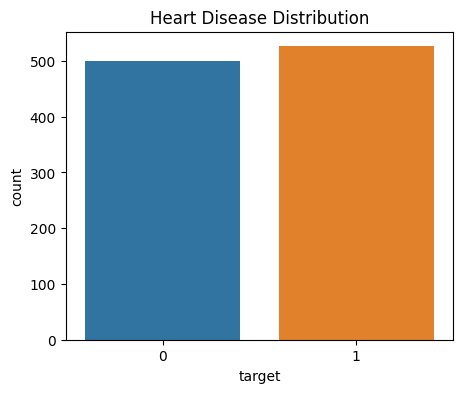

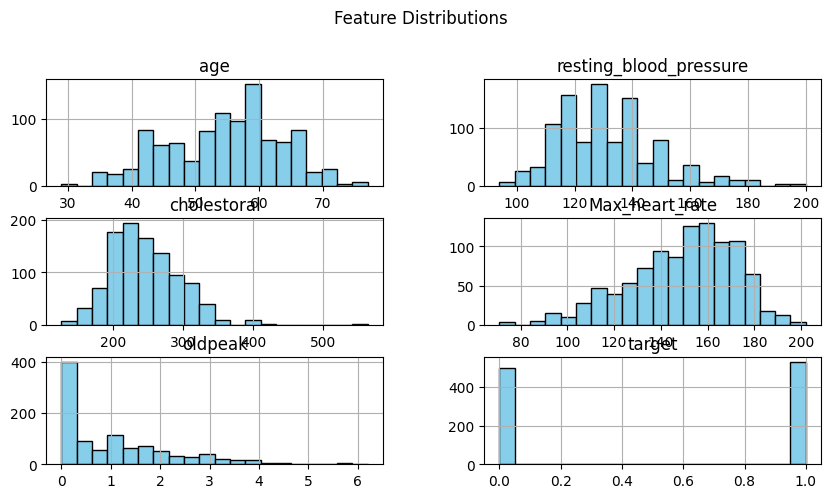

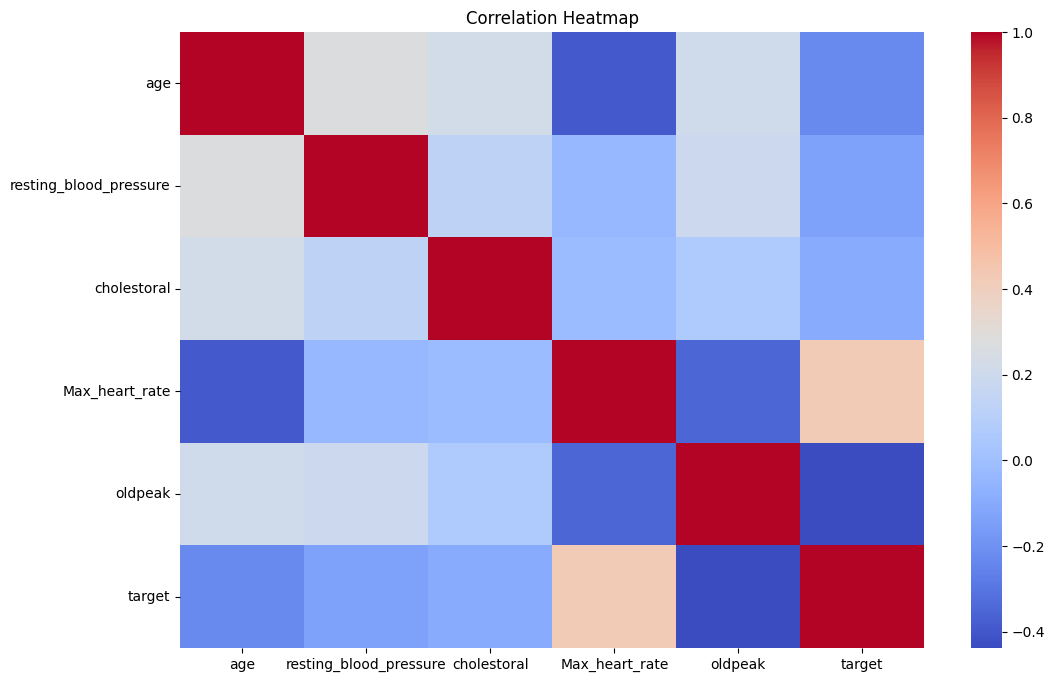

In [38]:
# 4. EDA

# Target distribution
plt.figure(figsize=(5,4))
sns.countplot(x="target", data=df)
plt.title("Heart Disease Distribution")
plt.show()

# Histograms
df.hist(figsize=(10,5), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Feature Distributions", y=1.02)
plt.show()

# Correlation heatmap (only numeric columns will be shown)
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [39]:
# 5. Encode Categorical Values

# We MUST convert all string columns into numeric 
# Label Encoding keeps the structure simple \

encoder = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = encoder.fit_transform(df[col])

df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,3,125,212,1,2,168,0,1.0,0,3,3,0
1,53,1,3,140,203,0,1,155,1,3.1,2,4,3,0
2,70,1,3,145,174,1,2,125,1,2.6,2,4,3,0
3,61,1,3,148,203,1,2,161,0,0.0,0,1,3,0
4,62,0,3,138,294,0,2,106,0,1.9,1,2,0,0


In [40]:
# 6. Split into Features & Target

X = df.drop("target", axis=1)
y = df["target"]

In [41]:
#Data splitting : 8) training, 20% testing 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [43]:
# 7. Train the Model

# Decision Tree 
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=9, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=42)

In [44]:
# 8. Predictions

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [45]:
# 9. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

Accuracy: 0.9707317073170731
Precision: 1.0
Recall: 0.941747572815534
F1: 0.97


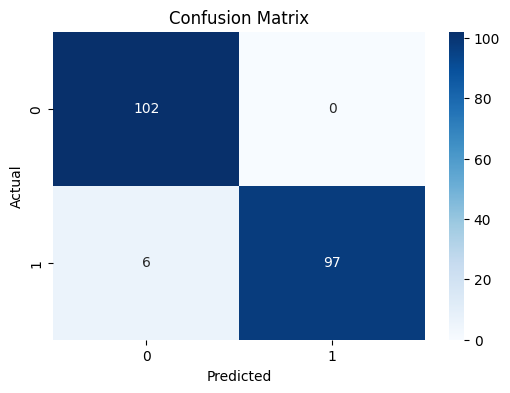

In [46]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

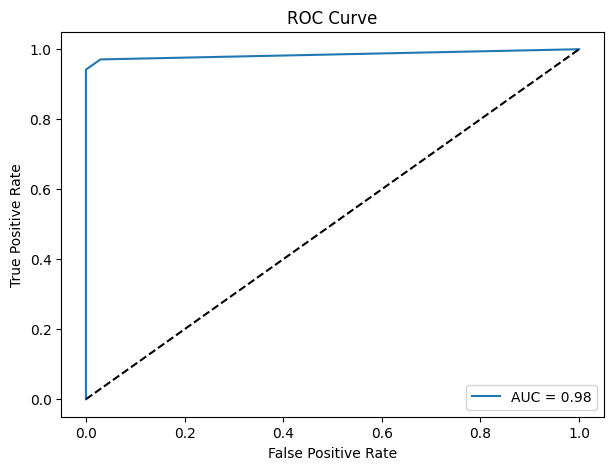

In [47]:
# ROC Curve
fpr, tpr, th = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],"k--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [48]:
# 10. Feature Importance

importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance

,Feature,Importance
12,thalassemia,0.293839
2,chest_pain_type,0.149101
11,vessels_colored_by_flourosopy,0.119625
0,age,0.095397
7,Max_heart_rate,0.093101
9,oldpeak,0.077687
3,resting_blood_pressure,0.075588
4,cholestoral,0.058936
10,slope,0.011768
1,sex,0.010492
